In [74]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/encoded.csv', index_col=0)
df.head()

,date,time,district,n_p,dtp_v,s_pch,osv,change_org_motion,woman_drv,pogoda,driver_narush,alco,posled,sdor
0,2015-05-12,09:20:00,КАШАРСКИЙ,сл Кашары,1,1,2,2,1,1,1,0,1,5
1,2016-03-09,17:20:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,1,5
2,2018-08-19,17:40:00,КАШАРСКИЙ,NaN,0,1,2,2,0,1,1,0,0,5
3,2018-08-08,14:15:00,КАШАРСКИЙ,NaN,0,1,2,2,1,1,1,0,1,5
4,2015-03-07,21:15:00,КАШАРСКИЙ,NaN,1,1,0,1,0,1,1,1,2,5


In [2]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [23]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('ggplot')
import warnings
import itertools
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Москва

In [75]:
dfl = df[df['n_p']=='г Москва']

In [76]:
dfl = dfl.sort_values(by=['date'])
dfl = dfl[['date']].copy()
dfl['y'] = 1
dfl.date = pd.to_datetime(dfl.date)
dfl.head()

,date,y
418948,2015-01-01,1
405991,2015-01-01,1
405008,2015-01-01,1
423479,2015-01-01,1
393190,2015-01-01,1


In [82]:
y = dfl.groupby(pd.Grouper(key='date',freq='D')).count()
y.head()

,y
date,
2015-01-01,19
2015-01-02,23
2015-01-03,16
2015-01-04,17
2015-01-05,17


In [78]:
month_count = m['y'].values
month = m['y'].index
month_count = pd.DataFrame(month_count)
month = pd.DataFrame(month)
month['dtp'] = month_count[0]
month.columns=['ds','y']

In [81]:
week_count = w['y'].values
week = w['y'].index
week_count = pd.DataFrame(week_count)
week = pd.DataFrame(week)
week['dtp'] = week_count[0]
week.columns=['ds','y']

In [83]:
day_count = y['y'].values
day = y['y'].index
day_count = pd.DataFrame(day_count)
day = pd.DataFrame(day)
day['dtp'] = day_count[0]
day.columns=['ds','y']

## РФ

In [3]:
df = df.sort_values(by=['date'])
df = df[['date']].copy()
df['y'] = 1
df.date = pd.to_datetime(df.date)
df.head()

,date,y
343040,2015-01-01,1
539432,2015-01-01,1
539433,2015-01-01,1
459293,2015-01-01,1
529159,2015-01-01,1


In [15]:
y = df.groupby(pd.Grouper(key='date',freq='Y')).count()
y.head()

,y
date,
2015-12-31,183905
2016-12-31,173615
2017-12-31,169320
2018-12-31,168045
2019-12-31,147138


In [10]:
month_count = m['y'].values
month = m['y'].index
month_count = pd.DataFrame(month_count)
month = pd.DataFrame(month)
month['dtp'] = month_count[0]
month.columns=['ds','y']

In [6]:
week_count = w['y'].values
week = w['y'].index
week_count = pd.DataFrame(week_count)
week = pd.DataFrame(week)
week['dtp'] = week_count[0]
week.columns=['ds','y']

In [12]:
day_count = y['y'].values
day = y['y'].index
day_count = pd.DataFrame(day_count)
day = pd.DataFrame(day)
day['dtp'] = day_count[0]
day.columns=['ds','y']

In [14]:
quorter_count = y['y'].values
quorter = y['y'].index
quorter_count = pd.DataFrame(quorter_count)
quorter = pd.DataFrame(quorter)
quorter['dtp'] = quorter_count[0]
quorter.columns=['ds','y']

In [16]:
year_count = y['y'].values
year = y['y'].index
year_count = pd.DataFrame(year_count)
year = pd.DataFrame(year)
year['dtp'] = year_count[0]
year.columns=['ds','y']

In [55]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'Средняя абсолютная процентная ошибка':mape, 'Средняя ошибка':me, 'Средняя абсолютная ошибка': mae, 
            'Средняя ошибка в процентах': mpe, 'Среднеквадратичная ошибка':rmse, #'acf1':acf1, 
            'Соотношение фактического и прогноза':corr, 'Мин-макс ошибка':minmax})

In [92]:
month

,ds,y
0,2015-01-31,701
1,2015-02-28,686
2,2015-03-31,700
3,2015-04-30,765
4,2015-05-31,926
5,2015-06-30,832
6,2015-07-31,783
7,2015-08-31,898
8,2015-09-30,908
9,2015-10-31,855


In [93]:
split_date ='2018-12-30'
df_training = month.loc[month.ds <= split_date]
df_test = month.loc[month.ds > split_date]
print(f"{len(df_training)} month of training data \n {len(df_test)} month of testing data ")

47 month of training data 
 12 month of testing data 


# Prophet

## По РФ

## Посуточное прогнозирование значений ДТП

In [21]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df_training)
future=m.make_future_dataframe(periods=30,freq='D')
forecast=m.predict(df_test)
forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-11-01,433.019004,449.748642,559.172103,433.019004,433.019004,0.166634,0.166634,0.166634,0.073480,0.073480,0.073480,0.093154,0.093154,0.093154,0.0,0.0,0.0,505.174499
1,2019-11-02,432.942899,457.054199,563.862075,432.942899,432.942899,0.175998,0.175998,0.175998,0.085836,0.085836,0.085836,0.090163,0.090163,0.090163,0.0,0.0,0.0,509.140200
2,2019-11-03,432.866794,405.471609,519.342967,432.866794,432.866794,0.060541,0.060541,0.060541,-0.026729,-0.026729,-0.026729,0.087271,0.087271,0.087271,0.0,0.0,0.0,459.073148
3,2019-11-04,432.790688,406.774070,517.666881,432.790688,432.790688,0.068470,0.068470,0.068470,-0.015957,-0.015957,-0.015957,0.084428,0.084428,0.084428,0.0,0.0,0.0,462.423973
4,2019-11-05,432.714583,400.524824,510.047353,432.714583,432.714583,0.044799,0.044799,0.044799,-0.036786,-0.036786,-0.036786,0.081585,0.081585,0.081585,0.0,0.0,0.0,452.099859


{'Мин-макс ошибка': 0.07298744219224684,
 'Соотношение фактического и прогноза': 0.49071139355169263,
 'Среднеквадратичная ошибка': 43.51659518464196,
 'Средняя абсолютная ошибка': 35.0561992696747,
 'Средняя абсолютная процентная ошибка': 0.07830165330428357,
 'Средняя ошибка': 0.1742175126359863,
 'Средняя ошибка в процентах': 0.009402561178763884}

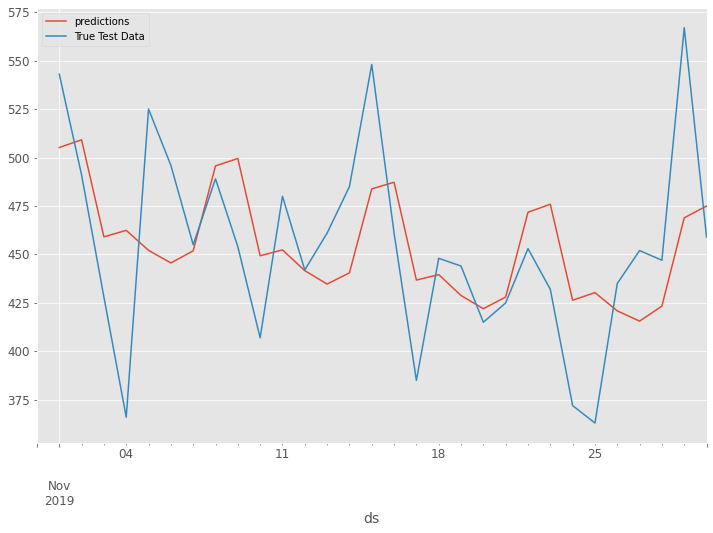

In [59]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-10-31','2019-11-30'))
forecast_accuracy(forecast.yhat.values,df_test.y.values)

## Понедельное прогнозирование значений ДТП

In [63]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df_training)
future=m.make_future_dataframe(periods=17,freq='W')
forecast=m.predict(df_test)
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-08-11,3150.307075,3532.847616,4054.768583,3150.307075,3150.307075,0.205607,0.205607,0.205607,0.205607,0.205607,0.205607,0.0,0.0,0.0,3798.032633
1,2019-08-18,3149.371314,3577.464754,4100.592719,3149.371314,3149.371314,0.216852,0.216852,0.216852,0.216852,0.216852,0.216852,0.0,0.0,0.0,3832.317393
2,2019-08-25,3148.435553,3572.415036,4097.964937,3148.348920,3148.465917,0.219681,0.219681,0.219681,0.219681,0.219681,0.219681,0.0,0.0,0.0,3840.085996
3,2019-09-01,3147.499791,3566.631728,4063.638161,3147.306722,3147.594906,0.215345,0.215345,0.215345,0.215345,0.215345,0.215345,0.0,0.0,0.0,3825.298377
4,2019-09-08,3146.564030,3557.776438,4071.701235,3146.255987,3146.794247,0.210514,0.210514,0.210514,0.210514,0.210514,0.210514,0.0,0.0,0.0,3808.958437


{'Мин-макс ошибка': 0.04677725579090075,
 'Соотношение фактического и прогноза': 0.8535813805181327,
 'Среднеквадратичная ошибка': 224.11980753962166,
 'Средняя абсолютная ошибка': 169.8802203076358,
 'Средняя абсолютная процентная ошибка': 0.05108109215224762,
 'Средняя ошибка': 160.41209192432348,
 'Средняя ошибка в процентах': 0.04863826515317956}

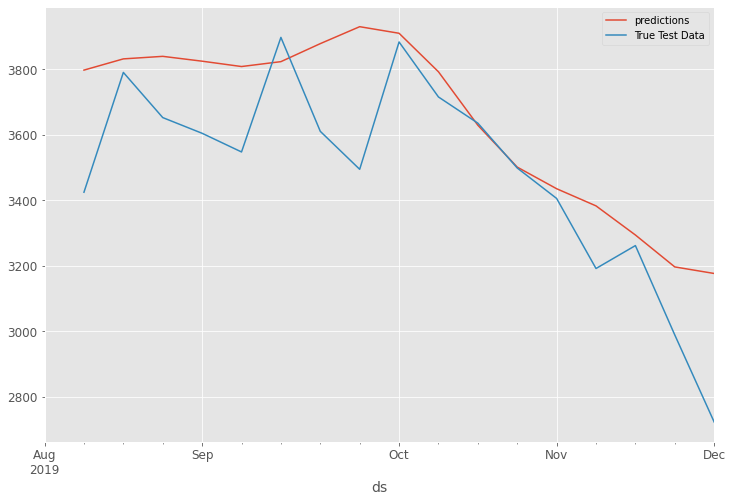

In [65]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-08-04','2019-12-01'))
forecast_accuracy(forecast.yhat.values,df_test.y.values)

## Помесячное прогнозирование значений ДТП

In [71]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df_training)
future=m.make_future_dataframe(periods=12,freq='M')
forecast=m.predict(df_test)
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-12-31,14055.245043,14990.646753,15687.761415,14054.277130,14056.543587,0.090751,0.090751,0.090751,0.090751,0.090751,0.090751,0.0,0.0,0.0,15330.778465
1,2019-01-31,14053.750639,11019.211021,11696.363591,14049.193710,14058.545584,-0.192187,-0.192187,-0.192187,-0.192187,-0.192187,-0.192187,0.0,0.0,0.0,11352.796262
2,2019-02-28,14052.400855,9260.364692,9943.880608,14043.784428,14061.156191,-0.317223,-0.317223,-0.317223,-0.317223,-0.317223,-0.317223,0.0,0.0,0.0,9594.662682
3,2019-03-31,14050.906452,9833.159735,10512.356576,14036.353314,14066.150004,-0.276682,-0.276682,-0.276682,-0.276682,-0.276682,-0.276682,0.0,0.0,0.0,10163.270511
4,2019-04-30,14049.460255,10677.046889,11386.868774,14028.214455,14071.251768,-0.214139,-0.214139,-0.214139,-0.214139,-0.214139,-0.214139,0.0,0.0,0.0,11040.921313


{'Мин-макс ошибка': 0.04091917427803293,
 'Соотношение фактического и прогноза': 0.990840329121145,
 'Среднеквадратичная ошибка': 724.2242809463916,
 'Средняя абсолютная ошибка': 611.6037924265362,
 'Средняя абсолютная процентная ошибка': 0.04307694685058616,
 'Средняя ошибка': 475.3920349373939,
 'Средняя ошибка в процентах': 0.030471520750473158}

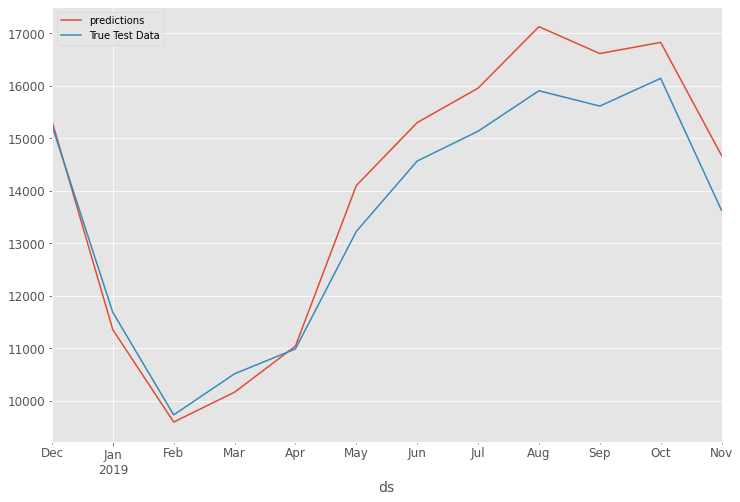

In [72]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-12-30','2019-11-30'))
forecast_accuracy(forecast.yhat.values,df_test.y.values)

# По Москве

## Посуточное прогнозирование значений ДТП

In [86]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df_training)
future=m.make_future_dataframe(periods=30,freq='D')
forecast=m.predict(df_test)
forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-11-01,22.335058,18.809871,32.991316,22.335058,22.335058,0.155618,0.155618,0.155618,0.070501,0.070501,0.070501,0.085117,0.085117,0.085117,0.0,0.0,0.0,25.810792
1,2019-11-02,22.335848,16.571773,30.194398,22.335848,22.335848,0.049501,0.049501,0.049501,-0.041061,-0.041061,-0.041061,0.090562,0.090562,0.090562,0.0,0.0,0.0,23.441489
2,2019-11-03,22.336638,13.821733,28.816670,22.336638,22.336638,-0.051766,-0.051766,-0.051766,-0.147975,-0.147975,-0.147975,0.096209,0.096209,0.096209,0.0,0.0,0.0,21.180350
3,2019-11-04,22.337427,17.116823,32.161680,22.337427,22.337427,0.100979,0.100979,0.100979,-0.000939,-0.000939,-0.000939,0.101918,0.101918,0.101918,0.0,0.0,0.0,24.593032
4,2019-11-05,22.338217,17.738017,32.466853,22.338217,22.338217,0.136905,0.136905,0.136905,0.029355,0.029355,0.029355,0.107550,0.107550,0.107550,0.0,0.0,0.0,25.396440


{'Мин-макс ошибка': 0.1836322373309972,
 'Соотношение фактического и прогноза': 0.27766325439178813,
 'Среднеквадратичная ошибка': 6.831590392537784,
 'Средняя абсолютная ошибка': 5.328943389783968,
 'Средняя абсолютная процентная ошибка': 0.22597950916741574,
 'Средняя ошибка': -0.24639037555889967,
 'Средняя ошибка в процентах': 0.06425044811108754}

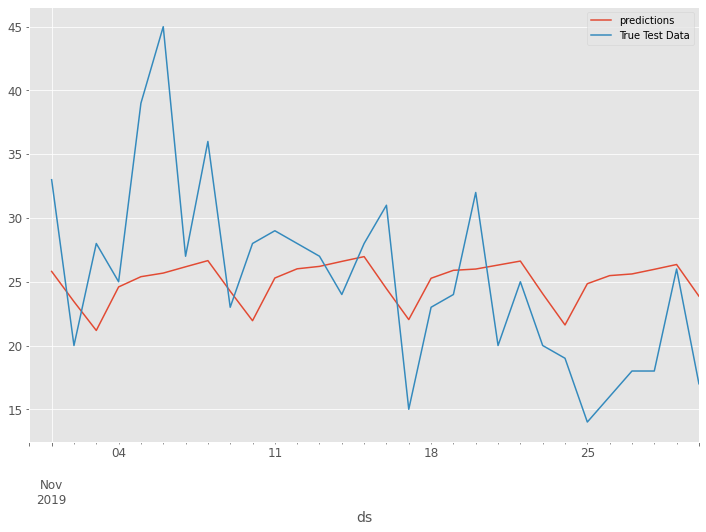

In [87]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-10-31','2019-11-30'))
forecast_accuracy(forecast.yhat.values,df_test.y.values)

## Понедельное прогнозирование значений ДТП

In [90]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df_training)
future=m.make_future_dataframe(periods=17,freq='W')
forecast=m.predict(df_test)
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-08-11,155.409547,139.824620,189.473745,155.409547,155.409547,0.062069,0.062069,0.062069,0.062069,0.062069,0.062069,0.0,0.0,0.0,165.055689
1,2019-08-18,155.456913,142.977533,192.951210,155.456913,155.456913,0.082147,0.082147,0.082147,0.082147,0.082147,0.082147,0.0,0.0,0.0,168.227265
2,2019-08-25,155.504279,146.475581,192.365000,155.497350,155.511629,0.087646,0.087646,0.087646,0.087646,0.087646,0.087646,0.0,0.0,0.0,169.133668
3,2019-09-01,155.551645,146.751918,196.104828,155.535750,155.566878,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.0,0.0,0.0,170.655451
4,2019-09-08,155.599011,149.292463,199.691307,155.568003,155.629851,0.126328,0.126328,0.126328,0.126328,0.126328,0.126328,0.0,0.0,0.0,175.255463


{'Мин-макс ошибка': 0.1016082055555576,
 'Соотношение фактического и прогноза': 0.28440222069249516,
 'Среднеквадратичная ошибка': 25.070039893353613,
 'Средняя абсолютная ошибка': 19.02514075678286,
 'Средняя абсолютная процентная ошибка': 0.11870910276490527,
 'Средняя ошибка': 1.428867797399749,
 'Средняя ошибка в процентах': 0.032244536332841876}

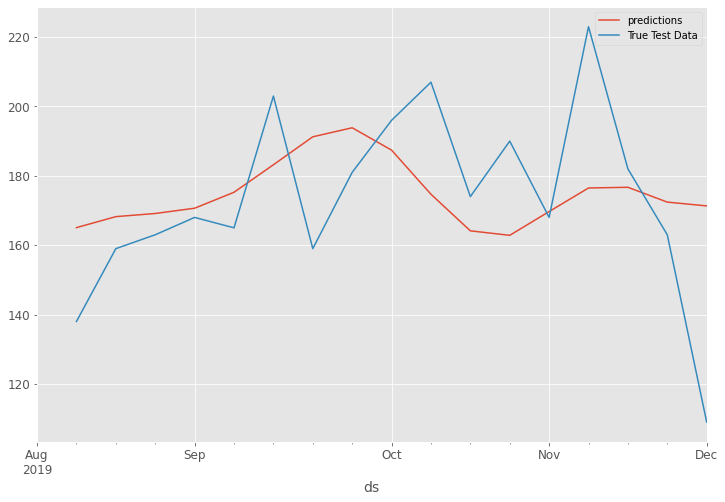

In [91]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-08-04','2019-12-01'))
forecast_accuracy(forecast.yhat.values,df_test.y.values)

## Помесячное прогнозирование значений ДТП

In [94]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(df_training)
future=m.make_future_dataframe(periods=12,freq='M')
forecast=m.predict(df_test)
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-12-31,695.035212,775.315060,839.562685,694.838632,695.211662,0.162460,0.162460,0.162460,0.162460,0.162460,0.162460,0.0,0.0,0.0,807.950515
1,2019-01-31,697.456328,518.606579,585.816329,696.600230,698.251917,-0.208855,-0.208855,-0.208855,-0.208855,-0.208855,-0.208855,0.0,0.0,0.0,551.789218
2,2019-02-28,699.643142,497.224471,563.608668,697.915131,701.178079,-0.242741,-0.242741,-0.242741,-0.242741,-0.242741,-0.242741,0.0,0.0,0.0,529.811026
3,2019-03-31,702.064258,551.962987,617.604560,699.167721,704.662359,-0.167142,-0.167142,-0.167142,-0.167142,-0.167142,-0.167142,0.0,0.0,0.0,584.719896
4,2019-04-30,704.407273,591.313698,657.970625,700.144439,708.011027,-0.111491,-0.111491,-0.111491,-0.111491,-0.111491,-0.111491,0.0,0.0,0.0,625.872156


{'Мин-макс ошибка': 0.060569220131604706,
 'Соотношение фактического и прогноза': 0.9103264660704067,
 'Среднеквадратичная ошибка': 53.68212486633017,
 'Средняя абсолютная ошибка': 43.69713868436909,
 'Средняя абсолютная процентная ошибка': 0.06596819166354374,
 'Средняя ошибка': 31.67811632208223,
 'Средняя ошибка в процентах': 0.04580843677586632}

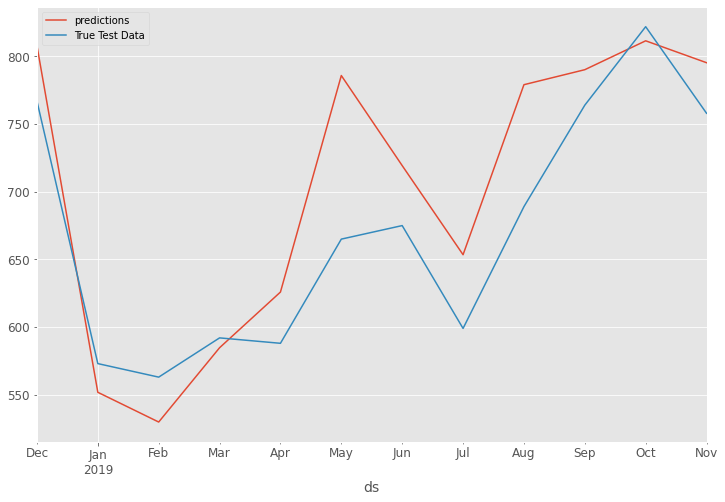

In [95]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-12-30','2019-11-30'))
forecast_accuracy(forecast.yhat.values,df_test.y.values)